In [1]:
# 1. Read the Titanic dataset and explore how many passengers survived with respect to their gender profiles.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Titanic_data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


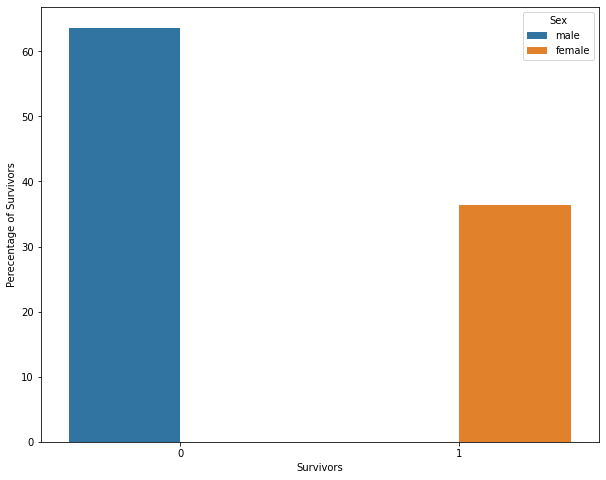

In [10]:
estimator = lambda x: len(x)/len(df) * 100

plt.figure(figsize=(10,8))
sns.barplot(x="Survived", y="Survived", hue="Sex", data=df, estimator=estimator)
plt.xlabel("Survivors")
plt.ylabel("Perecentage of Survivors")
plt.show()

In [11]:
#############################################################################

In [12]:
# 2. Create a pie chart displaying the proportion of passenger class ("Pclass") in the Titanic dataset.

In [13]:
df['Pclass'].unique()

array([3, 2, 1], dtype=int64)

In [17]:
df['Pclass'].value_counts()/len(df['Pclass'])*100

3    52.153110
1    25.598086
2    22.248804
Name: Pclass, dtype: float64

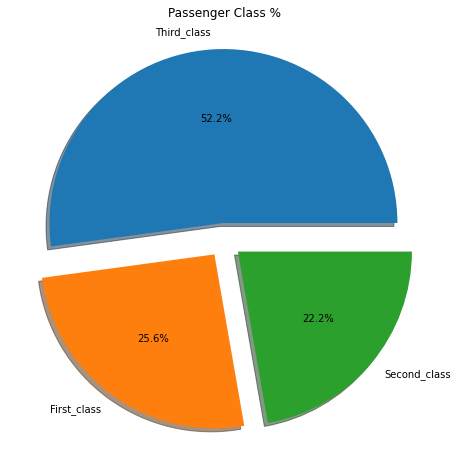

In [18]:
labels = ['Third_class', 'First_class', 'Second_class']
plt.figure(figsize=(10,8))
plt.pie(df["Pclass"].value_counts(), labels=labels, explode=[0.1,0.1,0.1], autopct='%1.1f%%', shadow=True)
plt.title("Passenger Class %")
plt.show()

In [19]:
#########################################################################

In [20]:
# 3. Plot the distribution of "Fare" attribute present in the Titanic data and superimpose a density plot of the same.

In [23]:
df['PassengerId'].nunique()

418

Text(0, 0.5, 'Density')

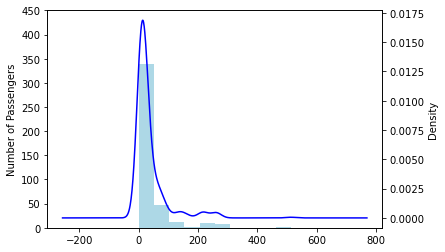

In [24]:
ax1 = df['Fare'].plot(kind = 'hist', color = 'lightblue',ylim=(0,450))          #ylim=(0,450) since number_of_passengers are 418
ax2 = df['Fare'].plot(kind = 'density', secondary_y = True, color = 'blue',ax=ax1)
ax1.set_ylabel('Number of Passengers')
ax2.set_ylabel('Density')

In [26]:
############################################################################################

In [28]:
# 4. Analyze using appropriate visuals the relationship between "Embarked" and "Age" based on gender profile of passengers.

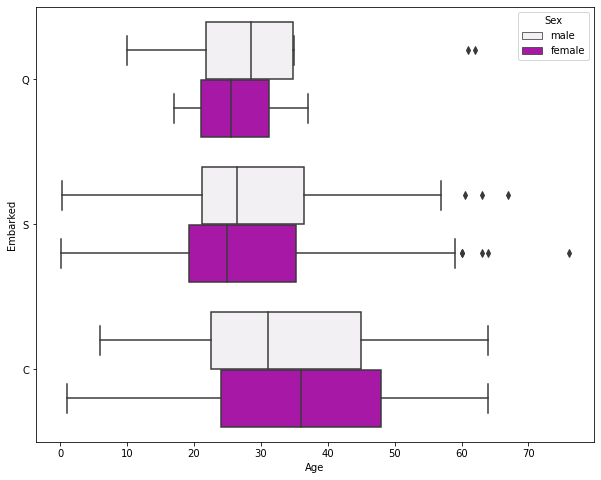

In [36]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Age", y="Embarked", hue="Sex", data=df, color='m')
plt.show()

In [37]:
#######################################################################

In [38]:
# 5. Using suitable visualization methods, analyze the relationship between the numerical features present in the dataset.

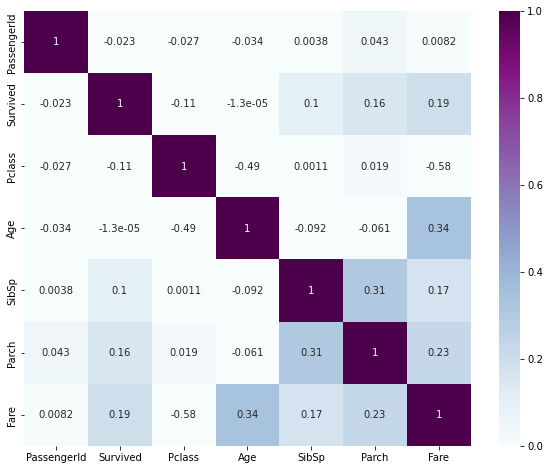

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="BuPu", vmin=0, vmax=1)
plt.show()

In [3]:
####################################################################################################

In [4]:
# 6. Discover whether any relation exists between "Sex" and "Fare" using any suitable visualization mode.

In [7]:
table = pd.pivot_table(data=df, index=['Sex'], values='Fare')
table

,Fare
Sex,
female,49.747699
male,27.527877


<AxesSubplot:xlabel='Sex'>

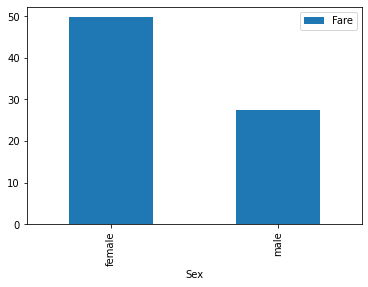

In [8]:
table.plot(kind='bar')

In [9]:
# the female passengers paid remarkably more for the tickets than the male passengers

In [10]:
######################################################################################

In [11]:
# 7. What inferences may be drawn regarding the average survival rate of the passengers aboard the Titanic in relation to the
#    passenger class?

In [45]:
table = pd.pivot_table(df, index=['Pclass'], aggfunc={'Survived':np.mean})
table

,Survived
Pclass,
1,0.467290
2,0.322581
3,0.330275


<AxesSubplot:xlabel='Pclass'>

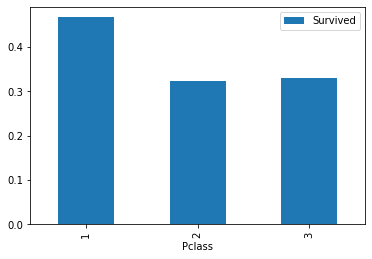

In [46]:
table.plot(kind='bar')

In [22]:
# The survival rate of passengers aboard the Titanic decreased with a degrading Pclass

In [23]:
#########################################################################################

In [26]:
# 8. Explore the relation between the age and the survival status of the passengers using histogram.

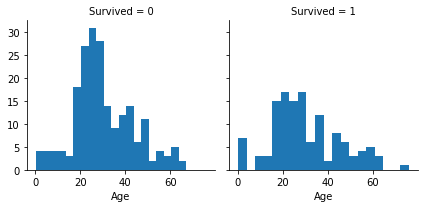

In [27]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [28]:
# Large number of 15-30 year olds did not survive.

In [29]:
##############################################################################################

In [30]:
# 9. What is the correlation between age, class and survival status of passengers? Use an appropriate visual to identify the same.

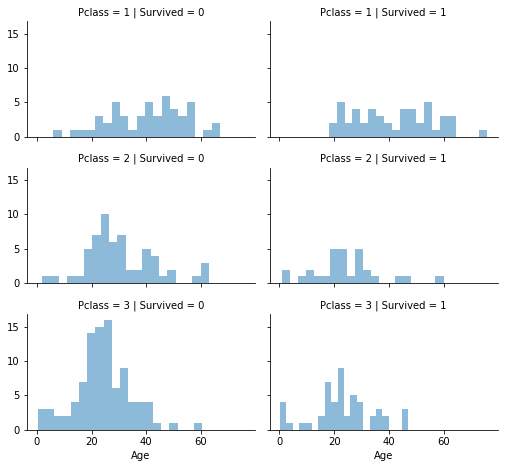

In [32]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [33]:
# Pclass=3 had most passengers, however most did not survive.
# Infant passengers in Pclass=2 and Pclass=3 mostly survived.

In [34]:
####################################################################################

In [44]:
# 10. Plot the percentage of passengers with different numbers of parents/children according to the survival status.

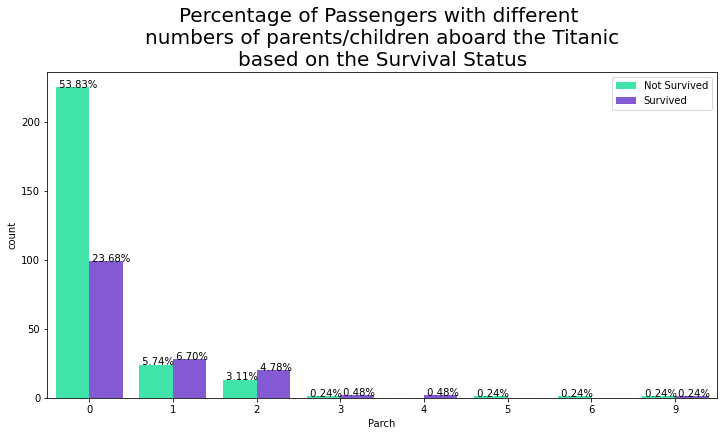

In [43]:
total = len(df)
plt.figure(figsize=(12,6))
ax = sns.countplot(x='Parch', data=df, palette=['#26ffb0', '#7c46e8'], hue='Survived')

for i in ax.patches:
    percentage = ' '*1 + '{:.2f}%'.format((i.get_height()/total)*100)
    x = i.get_x()
    y = i.get_height()
    ax.annotate(percentage, (x,y))

plt.title("Percentage of Passengers with different \nnumbers of parents/children aboard the Titanic\nbased on the Survival Status", size=20)
plt.legend(loc='upper right', labels=['Not Survived', 'Survived'])

In [40]:
### end of notebook